In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
from PyPDF2 import PdfReader

def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        pdf_reader = PdfReader(file)
        text = ''
        for page in pdf_reader.pages:
            text += page.extract_text()
    return text

pdf_text = extract_text_from_pdf(r"C:\Users\hemal\py_ml_workout\fee.pdf")
print(pdf_text)


Harvard College Tuition and Fees
FY2015 - FY2024
Academic
Year TuitionHealth
Services Fee Board RoomStudent
Services Fee Total
2024 $54,269 $1,408 $7,950 $12,424 $3,399 $79,450
2023 $52,659 $1,304 $7,446 $12,056 $3,298 $76,763
2022 $51,143 $1,242 $7,236 $11,705 $3,202 $74,528
2021 $49,653 $1,206 $7,025 $11,364 $3,109 $72,357
2020 $47,730 $1,206 $6,755 $10,927 $2,989 $69,607
2019 $46,340 $1,178 $6,551 $10,609 $2,902 $67,580
2018 $44,990 $1,142 $6,360 $10,300 $2,817 $65,609
2017 $43,280 $1,088 $6,057 $9,894 $2,706 $63,025
2016 $41,632 $1,042 $5,858 $9,523 $2,604 $60,659
2015 $40,418 $992 $5,660 $9,009 $2,528 $58,607
Source: School websites.


In [3]:
import pandas as pd

def parse_text_to_dataframe(text):
    # Split text into rows
    rows = text.strip().split('\n')
    
    # Split rows into columns based on space or tab delimiter
    data = [row.split() for row in rows]
    
    # Get the header from the first row
    headers = data[0]
    
    # Create DataFrame with data skipping the first row (which is the header)
    df1 = pd.DataFrame(data[1:], columns=headers)
    
    return df1

pdf_text = """AcademicYear Tuition HealthServicesFee Board Room StudentServicesFee Total
2024 $54,269 $1,408 $7,950 $12,424 $3,399 $79,450
2023 $52,659 $1,304 $7,446 $12,056 $3,298 $76,763
2022 $51,143 $1,242 $7,236 $11,705 $3,202 $74,528
2021 $49,653 $1,206 $7,025 $11,364 $3,109 $72,357
2020 $47,730 $1,206 $6,755 $10,927 $2,989 $69,607
2019 $46,340 $1,178 $6,551 $10,609 $2,902 $67,580
2018 $44,990 $1,142 $6,360 $10,300 $2,817 $65,609
2017 $43,280 $1,088 $6,057 $9,894 $2,706 $63,025
2016 $41,632 $1,042 $5,858 $9,523 $2,604 $60,659
2015 $40,418 $992 $5,660 $9,009 $2,528 $58,607"""

df1 = parse_text_to_dataframe(pdf_text)
print(df1)


  AcademicYear  Tuition HealthServicesFee   Board     Room StudentServicesFee  \
0         2024  $54,269            $1,408  $7,950  $12,424             $3,399   
1         2023  $52,659            $1,304  $7,446  $12,056             $3,298   
2         2022  $51,143            $1,242  $7,236  $11,705             $3,202   
3         2021  $49,653            $1,206  $7,025  $11,364             $3,109   
4         2020  $47,730            $1,206  $6,755  $10,927             $2,989   
5         2019  $46,340            $1,178  $6,551  $10,609             $2,902   
6         2018  $44,990            $1,142  $6,360  $10,300             $2,817   
7         2017  $43,280            $1,088  $6,057   $9,894             $2,706   
8         2016  $41,632            $1,042  $5,858   $9,523             $2,604   
9         2015  $40,418              $992  $5,660   $9,009             $2,528   

     Total  
0  $79,450  
1  $76,763  
2  $74,528  
3  $72,357  
4  $69,607  
5  $67,580  
6  $65,609  
7  $

In [4]:
df1.head()

,AcademicYear,Tuition,HealthServicesFee,Board,Room,StudentServicesFee,Total
0,2024,"$54,269","$1,408","$7,950","$12,424","$3,399","$79,450"
1,2023,"$52,659","$1,304","$7,446","$12,056","$3,298","$76,763"
2,2022,"$51,143","$1,242","$7,236","$11,705","$3,202","$74,528"
3,2021,"$49,653","$1,206","$7,025","$11,364","$3,109","$72,357"
4,2020,"$47,730","$1,206","$6,755","$10,927","$2,989","$69,607"


In [5]:
df1.dtypes

AcademicYear          object
Tuition               object
HealthServicesFee     object
Board                 object
Room                  object
StudentServicesFee    object
Total                 object
dtype: object

In [6]:
# Remove $ and comma from columns containing monetary values
df1['Tuition'] = df1['Tuition'].str.replace('$', '').str.replace(',', '')
df1['HealthServicesFee'] = df1['HealthServicesFee'].str.replace('$', '').str.replace(',', '')
df1['Board'] = df1['Board'].str.replace('$', '').str.replace(',', '')
df1['Room'] = df1['Room'].str.replace('$', '').str.replace(',', '')
df1['StudentServicesFee'] = df1['StudentServicesFee'].str.replace('$', '').str.replace(',', '')
df1['Total'] = df1['Total'].str.replace('$', '').str.replace(',', '')

# Convert columns to numeric
df1['Tuition'] = pd.to_numeric(df1['Tuition'])
df1['HealthServicesFee'] = pd.to_numeric(df1['HealthServicesFee'])
df1['Board'] = pd.to_numeric(df1['Board'])
df1['Room'] = pd.to_numeric(df1['Room'])
df1['StudentServicesFee'] = pd.to_numeric(df1['StudentServicesFee'])
df1['Total'] = pd.to_numeric(df1['Total'])
print(df1)


  AcademicYear  Tuition  HealthServicesFee  Board   Room  StudentServicesFee  \
0         2024    54269               1408   7950  12424                3399   
1         2023    52659               1304   7446  12056                3298   
2         2022    51143               1242   7236  11705                3202   
3         2021    49653               1206   7025  11364                3109   
4         2020    47730               1206   6755  10927                2989   
5         2019    46340               1178   6551  10609                2902   
6         2018    44990               1142   6360  10300                2817   
7         2017    43280               1088   6057   9894                2706   
8         2016    41632               1042   5858   9523                2604   
9         2015    40418                992   5660   9009                2528   

   Total  
0  79450  
1  76763  
2  74528  
3  72357  
4  69607  
5  67580  
6  65609  
7  63025  
8  60659  
9  58607 

In [7]:
df1.head(2)

,AcademicYear,Tuition,HealthServicesFee,Board,Room,StudentServicesFee,Total
0,2024,54269,1408,7950,12424,3399,79450
1,2023,52659,1304,7446,12056,3298,76763


In [8]:
df1.dtypes

AcademicYear          object
Tuition                int64
HealthServicesFee      int64
Board                  int64
Room                   int64
StudentServicesFee     int64
Total                  int64
dtype: object

In [9]:
# Convert AcademicYear column to integers
df1['AcademicYear'] = pd.to_numeric(df1['AcademicYear'])

# Check data types of columns
print(df1.dtypes)


AcademicYear          int64
Tuition               int64
HealthServicesFee     int64
Board                 int64
Room                  int64
StudentServicesFee    int64
Total                 int64
dtype: object


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression()

# Use AcademicYear as predictor variable
X = df1[['AcademicYear']]
y = df1['Total']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model.fit(X_train, y_train)

# Print coefficients
print("Intercept:", model.intercept_)
print("Coefficient ", model.coef_)


Intercept: -4585980.25862069
Coefficient  [2304.93965517]


# Assumptions for LR

# Linearity of dependent and independent Variables

<Axes: xlabel='AcademicYear', ylabel='Total'>

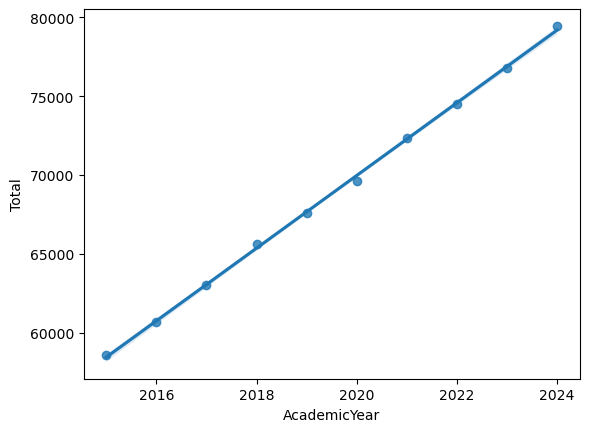

In [11]:
#Linearity 

import seaborn as sns

sns.regplot(x=df1['AcademicYear'], y=df1['Total'])



#  Homoscedasticity

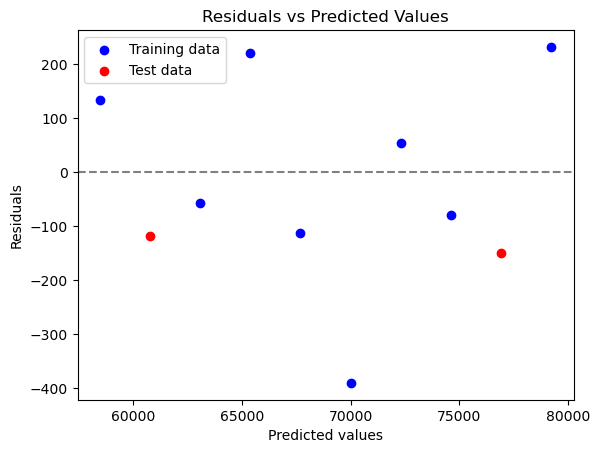

In [12]:
import matplotlib.pyplot as plt

# Calculate predicted y values
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate residuals
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

# Plot residuals vs predicted values for the training set
plt.scatter(y_pred_train, residuals_train, c='blue', label='Training data')
# Plot residuals vs predicted values for the test set
plt.scatter(y_pred_test, residuals_test, c='red', label='Test data')
# Add a horizontal line at y=0
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.legend()
plt.show()


In [13]:
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Add a constant term to X_train
X_train_with_const = sm.add_constant(X_train)

# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(residuals_train, X_train_with_const)

if bp_test[1] < 0.05:
    print("Assumption violated: Heteroscedasticity detected (Breusch-Pagan p-value < 0.05).")
else:
    print("Assumption satisfied: No significant heteroscedasticity detected (Breusch-Pagan p-value > 0.05).")


Assumption satisfied: No significant heteroscedasticity detected (Breusch-Pagan p-value > 0.05).


# Assumption : Normality of the residuals

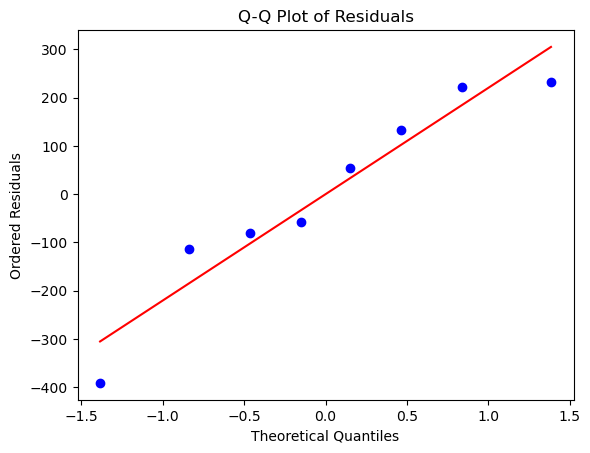

In [14]:
import scipy.stats as stats

# Generate Q-Q plot for residuals
stats.probplot(residuals_train, dist="norm", plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Residuals')
plt.title('Q-Q Plot of Residuals')
plt.show()

# In the below graph we can see that the residuals falls along the normal distribution line showing that they are 
# normally distributed

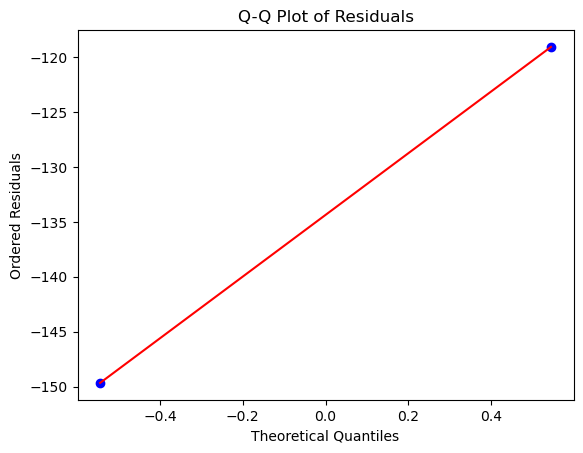

In [15]:
import scipy.stats as stats

# Generate Q-Q plot for residuals
stats.probplot(residuals_test, dist="norm", plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Residuals')
plt.title('Q-Q Plot of Residuals')
plt.show()

# In the below graph we can see that the residuals falls along the normal distribution line showing that they are 
# normally distributed

# Using Grid Search to find the best model

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X_train, y_train):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {}
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X_train, y_train)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Assuming X_train and y_train are already defined
find_best_model_using_gridsearchcv(X_train, y_train)


C:\Users\hemal\Anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hemal\Anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hemal\Anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\hemal\Anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\hemal\Anaconda3\Lib\site-packages\

,model,best_score,best_params
0,linear_regression,0.992142,{}
1,lasso,0.992130,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.404579,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [17]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [18]:
# export as a pickle file 

import pickle
   
pickle.dump(model, open("model.pkl", "wb"))

In [19]:
#old code

In [17]:
def predict_fees(year):
    # Finding the index corresponding to the year in the feature matrix
    year_index = np.where(X_train.columns == 'AcademicYear')[0][0]

    # Checking if the 'AcademicYear' column exists in the feature matrix
    if year_index >= 0:
        
        # Using the year value directly to predict the fees
        return model.predict([[year]])[0]
    else:
        raise ValueError("Column 'AcademicYear' not found in the feature matrix.")


In [18]:
predict_fees(2025)

C:\Users\hemal\Anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81522.54310344905

# Export the tested model to a pickle file

In [19]:
import pickle
with open('Harvard_Fees_Prediction.pickle','wb') as f:
    pickle.dump(model,f)

In [21]:
import json
columns={'data_columns':[col.lower() for col in X_train.columns] }

with open("columns.json","w") as f:
    f.write(json.dumps(columns))